In [1]:
!wget -N -q "https://matematica.unipv.it/gualandi/solvers/ipopt-linux64.zip"
!unzip -o -q ipopt-linux64

import os
os.environ["PATH"] += os.pathsep + "/content/ipopt-linux64/bin"


In [2]:
!pip install -q numpy matplotlib pyomo torch scipy


Проверим что установка прошла без технических шоколадок

In [3]:
import pyomo.environ as pyo
print("ipopt available:", pyo.SolverFactory("ipopt").available())


ipopt available: True


In [4]:
import torch
print("CUDA available:", torch.cuda.is_available())


CUDA available: True


Запускаем наш эксперимент

[NumPy backend, grid thinning] Reachable set size: 673, time = 1.332 s
[NumPy backend, Poisson thinning] Reachable set size: 161, time = 5.651 s
[Torch backend, grid thinning] Reachable set size: 239, time = 0.826 s
Measured speedup (NumPy grid / Torch grid) = 1.61x
Solving optimal control problems for boundary (Pyomo)...
OC boundary (Pyomo) computed with 32 points.
Computing OC boundary by brute-force over constant controls on the circle...
OC boundary (bruteforce) computed with 32 points.
Hausdorff distance between grid (grid thinning) and OC (Pyomo) sets: d_H = 0.9881
Hausdorff distance between OC (Pyomo) and OC (bruteforce) sets: d_H = 0.1030


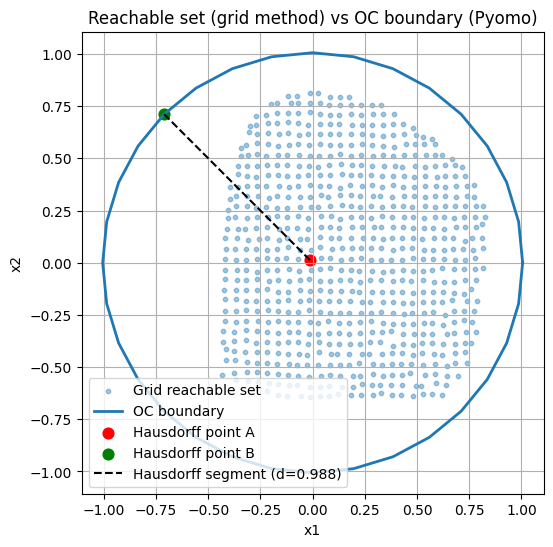

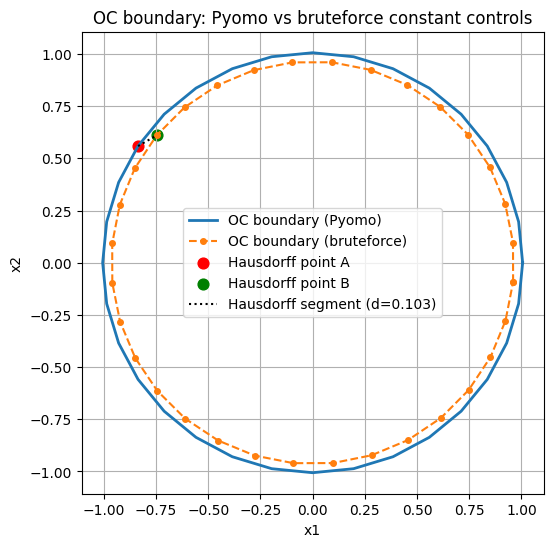

In [5]:
from experiment import run_experiment

run_experiment()

In [ ]:
import importlib
import experiment
importlib.reload(experiment)

from experiment import benchmark_reachability_speed

benchmark_reachability_speed()

Benchmark reachability (NumPy vs Torch on cuda)
CUDA available: True
--------------------------------------------------------------------------------
num_controls= 32, num_time_steps= 40 | NumPy=33.142s, Torch= 0.064s, speedup=515.03x, sizes: np=7110, torch=6867
num_controls= 32, num_time_steps= 80 | NumPy=59.257s, Torch= 0.101s, speedup=587.47x, sizes: np=6005, torch=4251
num_controls= 32, num_time_steps=160 | NumPy= 0.062s, Torch= 0.106s, speedup=0.59x, sizes: np=1, torch=1
num_controls= 64, num_time_steps= 40 | NumPy=69.398s, Torch= 0.089s, speedup=778.73x, sizes: np=7036, torch=6758
num_controls= 64, num_time_steps= 80 | NumPy=118.698s, Torch= 0.133s, speedup=891.46x, sizes: np=6033, torch=4267
num_controls= 64, num_time_steps=160 | NumPy= 0.143s, Torch= 0.106s, speedup=1.35x, sizes: np=1, torch=1
num_controls=128, num_time_steps= 40 | NumPy=137.358s, Torch= 0.148s, speedup=928.70x, sizes: np=7084, torch=6805
